# Vector grating

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_masks_XY import Vector_mask_XY

from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

from matplotlib import cm

In [3]:
from matplotlib import rcParams
rcParams['figure.dpi']=300
rcParams['figure.figsize']=(8,6)

1600.0


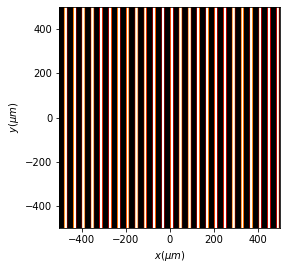

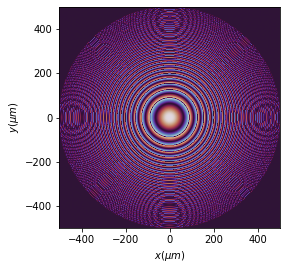

In [4]:
num_data = 1024
length = 1*mm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 2* um
period = 40*um
z_talbot = 2*period**2/wavelength

print(z_talbot)


t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.ronchi_grating(x0=0, period=period, fill_factor=0.33, angle=0*degrees)
t1.draw(kind='intensity')


focal=2*mm
t_lens = Scalar_mask_XY(x0, y0, wavelength)
t_lens.lens(r0=(0 * um, 0 * um),
                radius=length/2,
                focal=focal)
t_lens.draw(kind='phase')

In [5]:
p0 = Jones_matrix()
p0.diattenuator_perfect(azimuth=0)

p1 = Jones_matrix()
p1.diattenuator_perfect(azimuth=90*degrees)


t_vector = Vector_mask_XY(x0,y0,wavelength)
t_vector.complementary_masks(mask=t1, pol_state_0=p0, pol_state_1=p1)

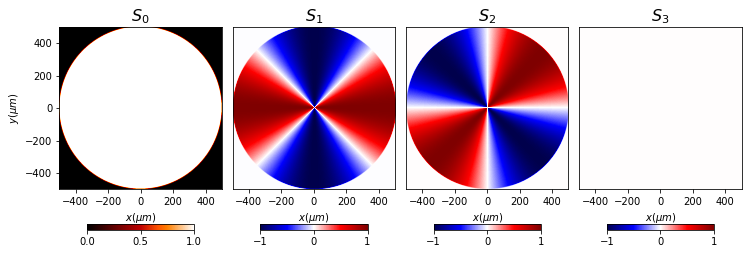

In [6]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.vortex_beam(A=1, r0=(0,0), w0=100*um, m=1)
u0.plane_wave(A=1)
u0.pupil()


E0 = Vector_source_XY(x0, y0, wavelength)
E0.constant_polarization(u=u0, v=(1, 1j))
E0.azimuthal_wave(u=u0, r0=(0, 0))
E0.radial_wave(u=u0, r0=(0, 0))
E0.draw('stokes')

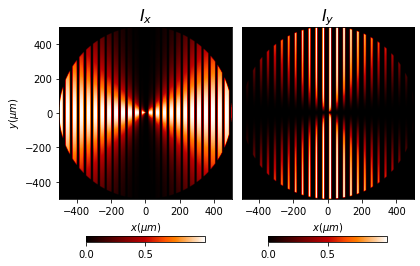

In [7]:
E1 = E0 * t_vector 
#E1.apply_mask(t_lens)
E1.draw('intensities', logarithm=False)

In [8]:
r_max = 3*period
xout = np.linspace(-r_max, r_max, 256)
yout = np.linspace(-r_max, r_max, 256)

E2 = E1.VCZT(z=z_talbot, xout=xout, yout=yout)
#E2 = E1.VRS(z=z_talbot)

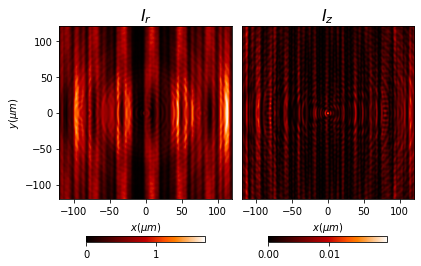

In [9]:
E2.draw('intensities_rz', logarithm=0)


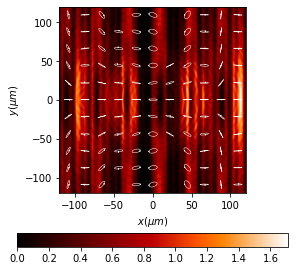

In [10]:
E2.draw('ellipses')

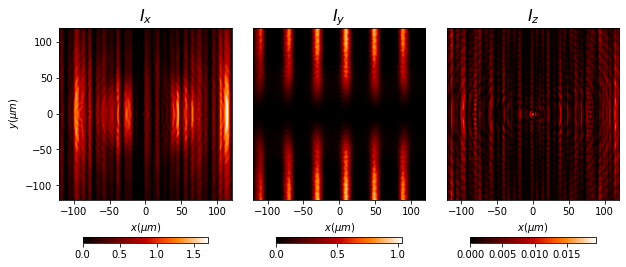

In [11]:
E2.draw('intensities', logarithm=0)

In [12]:
E_pypol = Jones_vector()
E_pypol.from_components(E2.Ex, E2.Ey)

The azimuth of E is (deg.):
The mean value is 90.00081478841173 +- 70.09890905890275


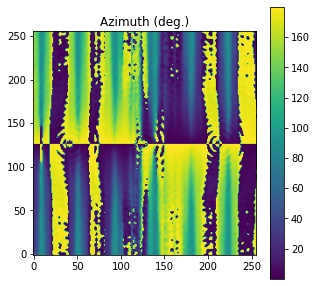

In [13]:
E_pypol.parameters.azimuth(draw=True)

The ellipticity angle of E is (deg.):


The mean value is -0.006962825379217351 +- 13.423105823257753


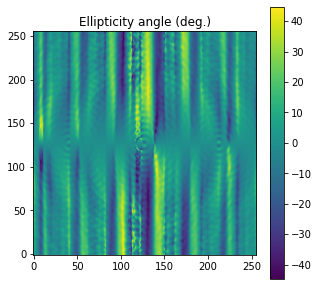

In [14]:
E_pypol.parameters.ellipticity_angle(draw=True)

The degree of circular polarization of E is:
The mean value is -0.00021777353493727388 +- 0.4146457726861018


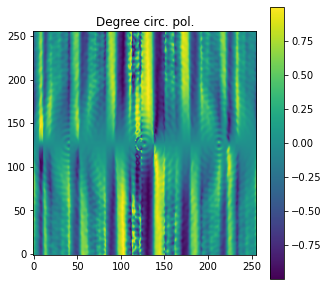

In [15]:
E_pypol.parameters.degree_circular_polarization(draw=True)

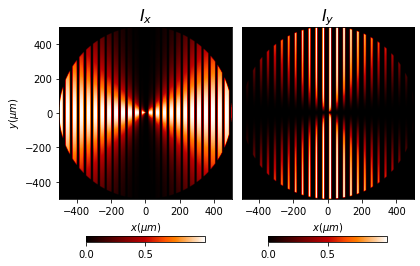

In [16]:
E1 = E0 * t_vector 
E2=E1.apply_mask(t_lens, new_field=True)
E2.draw('intensities', logarithm=False)

In [17]:
xout = np.linspace(-150,150,512)
yout = np.linspace(-100,100,512)

In [18]:
E3 = E2.VCZT(z=focal, xout=xout, yout=yout)

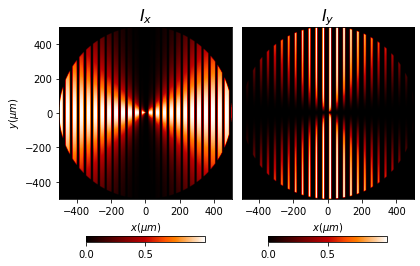

In [19]:
E2.draw('intensities')

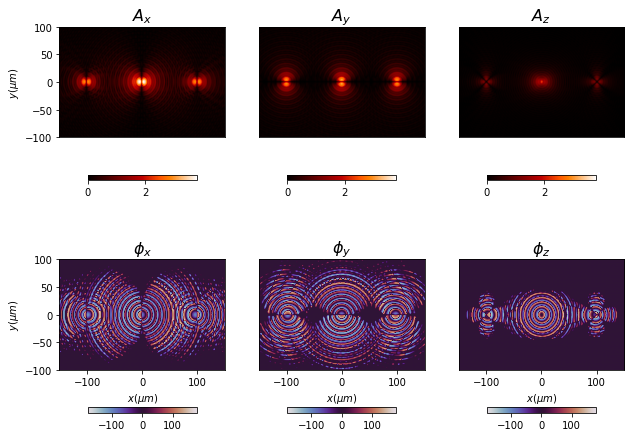

In [20]:
E3.draw('fields', logarithm=1e0)

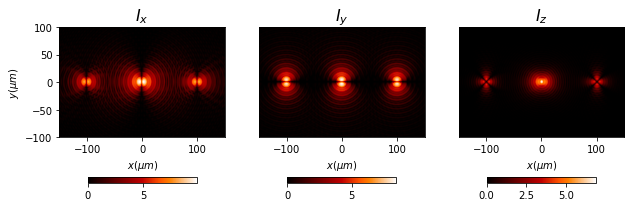

In [21]:
E3.draw('intensities', logarithm=1e1)

In [22]:
E3.draw('intensities%_rz', logarithm=1e1)

not good kind parameter in vector_fields_XY.draw()


In [23]:
Ix,Iy,Iz = E3.get('fields', is_matrix=False)

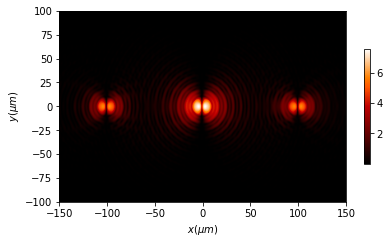

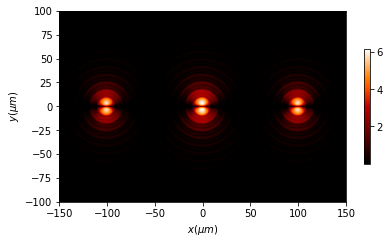

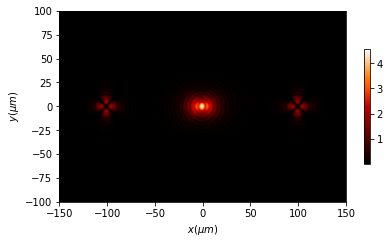

In [24]:
Ix.draw(logarithm=1e0, has_colorbar='vertical')
Iy.draw(logarithm=1e0, has_colorbar='vertical')
Iz.draw(logarithm=1e0, has_colorbar='vertical')

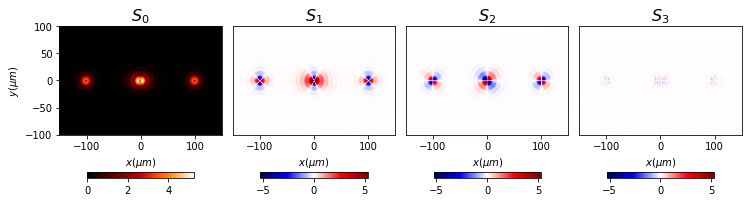

In [25]:
E3.draw('stokes',logarithm=1e-1)

In [26]:
E_pypol = Jones_vector()
E_pypol.from_components(E3.Ex, E3.Ey)

The azimuth of E is (deg.):
The mean value is 90.00224308917626 +- 52.50549908589659


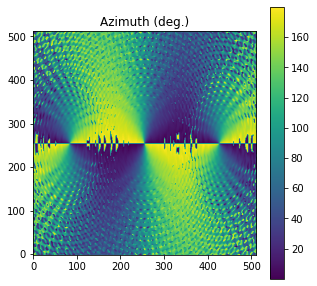

In [27]:
E_pypol.parameters.azimuth(draw=True)

The ellipticity angle of E is (deg.):
The mean value is 0.0023139875247736204 +- 16.298382119244877


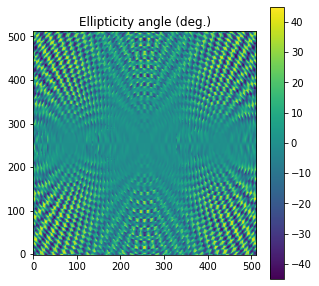

In [28]:
E_pypol.parameters.ellipticity_angle(draw=True)

The degree of circular polarization of E is:
The mean value is 4.642698262044434e-05 +- 0.4827440792079989


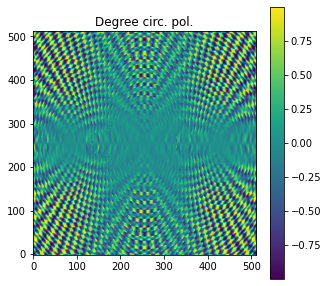

In [29]:
E_pypol.parameters.degree_circular_polarization(draw=True)